In [216]:
import mne
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [1]:
signal_path = "G:\\HMC22\\test\\edf\\SN1.edf"
annotation_path = "G:\\HMC22\\test\\scorings\\SN1.edf"

In [3]:
edf = mne.io.read_raw_edf(signal_path, preload=True)

print(edf)

Extracting EDF parameters from G:\HMC22\test\edf\SN1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7004159  =      0.000 ... 27359.996 secs...
<RawEDF  |  SN1.edf, n_channels x n_times : 27 x 7004160 (27360.0 sec), ~1.41 GB, data loaded>


In [184]:
edf.__dict__

{'_last_samps': array([7004159]),
 '_first_samps': array([0]),
 'info': <Info | 16 non-empty fields
     bads : list | 0 items
     ch_names : list | EEG A2-Cz, EEG C4-Cz, EEG A1-Cz, EEG Fpz-Cz, EMG chin+, ...
     chs : list | 27 items (EEG: 27)
     comps : list | 0 items
     custom_ref_applied : bool | False
     dev_head_t : Transform | 3 items
     events : list | 0 items
     highpass : float | 0.0 Hz
     hpi_meas : list | 0 items
     hpi_results : list | 0 items
     lowpass : float | 128.0 Hz
     meas_date : tuple | 2016-08-08 22:29:00 GMT
     nchan : int | 27
     proc_history : list | 0 items
     projs : list | 0 items
     sfreq : float | 256.0 Hz
     acq_pars : NoneType
     acq_stim : NoneType
     ctf_head_t : NoneType
     description : NoneType
     dev_ctf_t : NoneType
     device_info : NoneType
     dig : NoneType
     experimenter : NoneType
     file_id : NoneType
     gantry_angle : NoneType
     helium_info : NoneType
     hpi_subsystem : NoneType
     kit

In [235]:
with open("G:\\HMC22\\test\\scorings\\SN1.edf", "r") as f:
    for row in f:
#       prints header
        print(row[:500])
    
#       removes header
#       splitting the events
        texts = row[500:].strip().rsplit("\x14")
        
#       cleaning the data
        texts = [x.replace("\x00", "") for x in texts]
        texts = [x.replace("+", "") for x in texts]
        
#       Splits onset and duration
        texts = [x.replace("\x15", ":") for x in texts]
        texts = [x.split(":") for x in texts]


0       SN1                                                                             Startdate X X X X X                                                             08.08.1622.29.00512     EDF+C                                       5       0       1   EDF Annotations                                                                                         0       1       -32768  32767                                                                                   8192                        


In [241]:
total_length = edf._data.shape[1]
sfreq = edf.info["sfreq"]
seconds_to_hour = 60*60

print("This session lasted {} hours \n".format(total_length/sfreq/seconds_to_hour))

hypnogram = np.zeros(total_length)
limb_Movement = np.zeros(total_length)
arousals = np.zeros(total_length)
desaturation = np.zeros(total_length)
central_Apnea = np.zeros(total_length)
hypopnea = np.zeros(total_length)

cntr = Counter()

for i, x in enumerate(texts):
    if i%2 == 0:
        continue
    else:
        onset_duration = texts[i-1]
        event_name = texts[i][0]

        if "Lights on" in event_name:
            continue
        elif "Lights off" in event_name:
            continue
        elif event_name == "":
            continue
            
        onset_duration = [float(x) for x in onset_duration]
        
        onset_index = int(onset_duration[0]*sfreq)
        duration = int(onset_duration[1]*sfreq)
        
        if event_name == "Sleep stage W":
            hypnogram[onset_index:onset_index+duration] = 1
        elif event_name == "Sleep stage R":
            hypnogram[onset_index:onset_index+duration] = 0      
        elif event_name == "Sleep stage N1":
            hypnogram[onset_index:onset_index+duration] = -1       
        elif event_name == "Sleep stage N2":
            hypnogram[onset_index:onset_index+duration] = -2      
        elif event_name == "Sleep stage N3":
            hypnogram[onset_index:onset_index+duration] = -3        
        
        elif "EEG arousal" in event_name:
            arousals[onset_index:onset_index+duration] = 1     
        elif "Limb movement" in event_name:
            limb_Movement[onset_index:onset_index+duration] = 1 
        elif "Desaturation" in event_name:
            desaturation[onset_index:onset_index+duration] = 1 
        elif "Central apnea" in event_name:
            central_Apnea[onset_index:onset_index+duration] = 1 
        elif "Hypopnea" in event_name:
            hypopnea[onset_index:onset_index+duration] = 1 
            
        cntr[event_name] += 1
        
print(cntr)

This session lasted 7.6 hours 

Counter({'Limb movement@@EMG RAT': 454, 'Limb movement@@EMG LAT': 387, 'EEG arousal@@EEG Cz-O2': 45, 'EEG arousal@@EEG C4-A1': 36, 'Sleep stage N1': 35, 'Sleep stage N2': 29, 'Sleep stage W': 25, 'Desaturation@@SaO2': 19, 'Central apnea@@Resp nasal': 13, 'Sleep stage N3': 10, 'Hypopnea@@Resp nasal': 7, 'EEG arousal@@EEG Fpz-Cz': 1, 'Sleep stage R': 1, 'EEG arousal@@EOG E2-E1': 1})


<function matplotlib.pyplot.show(*args, **kw)>

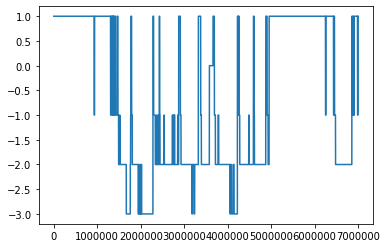

In [242]:
plt.plot(hypnogram)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

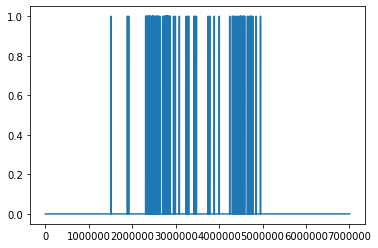

In [243]:
plt.plot(arousals)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

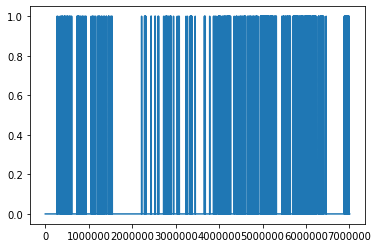

In [244]:
plt.plot(limb_Movement)
plt.show